In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [5]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [6]:
data= pd.read_csv('delivery_time.csv')

In [9]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# **EDA**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [13]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [15]:
#Checking for Null values:
print(data.isnull().sum())

Delivery Time    0
Sorting Time     0
dtype: int64


In [17]:
#Checking for Duplicate values:
print(data.duplicated().sum())

0


In [19]:
#Renaming columns as there are spaces between names:
data=data.rename({'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'}, axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [20]:
#Correlation:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


#Graphical respresntation of values:


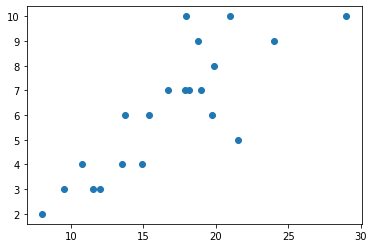

In [22]:
#Graph to check data descripancies
plt.scatter(data['delivery_time'], data['sorting_time'])

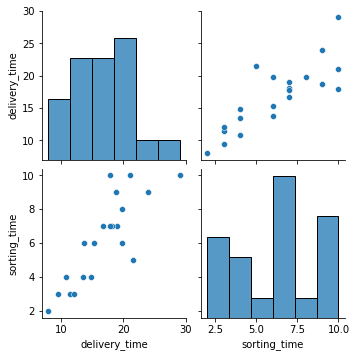

In [23]:
sns.pairplot(data)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

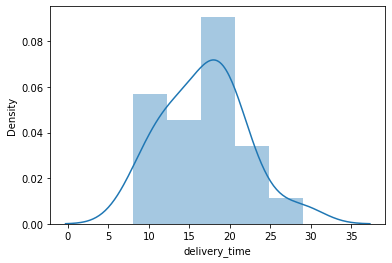

In [25]:
sns.distplot(data['delivery_time'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

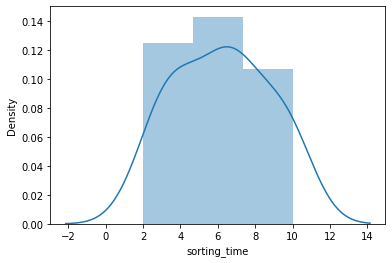

In [26]:
sns.distplot(data['sorting_time'])

#Regression model graph

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

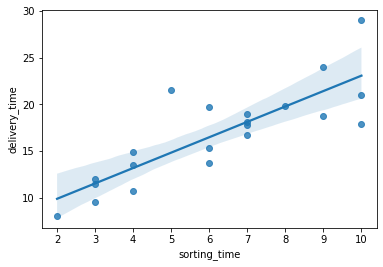

In [30]:
sns.regplot(x='sorting_time', y='delivery_time', data=data)

# Model building:

In [32]:
model=smf.ols('delivery_time~sorting_time', data=data).fit()

#Model Accurecy testing:

In [34]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [36]:
#tvalues and pvalues of the model:
print('The tvalues of the model are:\n{}  \n \nThe pvalues of the model are:\n{}'.format(model.tvalues, model.pvalues))

The tvalues of the model are:
Intercept       3.823349
sorting_time    6.387447
dtype: float64  
 
The pvalues of the model are:
Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [39]:
#R-Squared and Adjusted R-squared value for the model:
print('The Rsquared value of the model is:\n{}  \n \nThe Adjusted rsquared value of the model is:\n{}'.format(model.rsquared, model.rsquared_adj))

The Rsquared value of the model is:
0.6822714748417231  
 
The Adjusted rsquared value of the model is:
0.6655489208860244


#Prediction of delivery time:

In [40]:
#lets create a sample dataframe of values 25,30,35,40 to see how our model predicts data
S_data = pd.Series([25,30,35,40])
sample = pd.DataFrame(S_data,columns=['sorting_time'])
sample

,sorting_time
0,25
1,30
2,35
3,40


In [41]:
#now lets predict the delivery time using our model
model.predict(sample)

0    47.808231
1    56.053331
2    64.298430
3    72.543530
dtype: float64